In [2]:
import os
import re
import json
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------- Paths ----------
DATA_DIR = ".\\data\\"
INPUT_FILENAME = "data-1759774391562.csv"  # change if your filename differs
INPUT_PATH = os.path.join(DATA_DIR, INPUT_FILENAME)

OUT_DIR = os.path.join(DATA_DIR, "analysis_out")
os.makedirs(OUT_DIR, exist_ok=True)

# ---------- Load ----------
df = pd.read_csv(INPUT_PATH)

mapping = {"X": "Llama", "Y": "GPT", "Z": "human"}

def map_dmp_name(name):
    if pd.isna(name):
        return name
    s = str(name).strip()
    m = re.fullmatch(r"([XYZ])_(\d+)", s, flags=re.IGNORECASE)
    if m:
        prefix, idx = m.group(1).upper(), m.group(2)
        return f"{mapping[prefix]}_{idx}"
    return s

df["dmpName"] = df["dmpName"].apply(map_dmp_name)
df

,id,participantId,dmpName,evaluations,overallAuthorshipGuess,overallSatisfaction
0,cmf5ty7vf000f71010cu38kpq,1010,GPT_2,"[{""elementTitle"": ""Element 1: Data Type"", ""sel...",Human,4
1,cmfb72lh6000v7101jnbh5lvt,1028,Llama_9,"[{""elementTitle"": ""Element 1: Data Type"", ""sel...",LLM,4
2,cmf5tpuwh000e71013wgcr9tv,1010,Llama_3,"[{""elementTitle"": ""Element 1: Data Type"", ""sel...",Human,2
3,cmf5uiayf000g71018h284wad,1010,human_10,"[{""elementTitle"": ""Element 1: Data Type"", ""sel...",LLM,2
4,cmf5xk8j9000i7101r8lluz8x,1014,Llama_7,"[{""elementTitle"": ""Element 1: Data Type"", ""sel...",LLM,2
5,cmf5y3gin000j7101ed70wi56,1014,GPT_8,"[{""elementTitle"": ""Element 1: Data Type"", ""sel...",Human,5
6,cmf5yarhr000k7101pgtczwh0,1014,human_6,"[{""elementTitle"": ""Element 1: Data Type"", ""sel...",LLM,2
7,cmf707hjn000m7101o02fof41,1017,Llama_5,"[{""elementTitle"": ""Element 1: Data Type"", ""sel...",Human,4
8,cmf729chw000n7101oy6woy1t,1017,GPT_9,"[{""elementTitle"": ""Element 1: Data Type"", ""sel...",LLM,2
9,cmf72ip9s000o7101d2u8r4ap,1017,human_1,"[{""elementTitle"": ""Element 1: Data Type"", ""sel...",Human,4


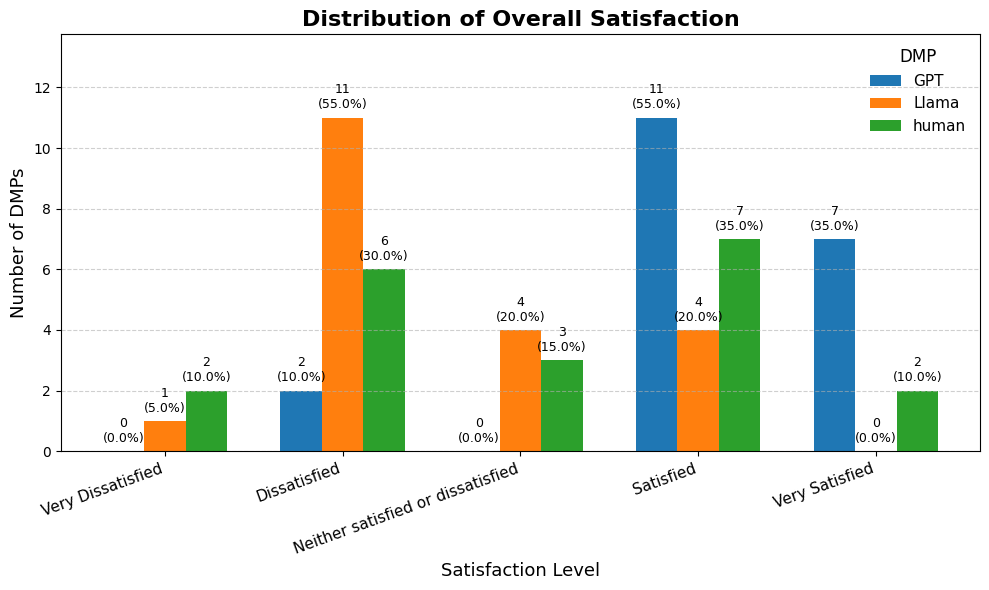

💾 Saved grouped chart to: ./plots\overall_satisfaction_by_group.png


In [3]:

# --- Output directory (same as before) ---
OUT_DIR = "./plots"
os.makedirs(OUT_DIR, exist_ok=True)

# ---------- Preprocess ----------
df["Group"] = df["dmpName"].str.extract(r"^(Llama|GPT|human)", expand=False)

# ---------- Build counts table ----------
bins = [1, 2, 3, 4, 5]
counts_tbl = (
    df.groupby(["Group", "overallSatisfaction"])
      .size()
      .unstack(fill_value=0)
      .reindex(columns=bins, fill_value=0)
)

desired_order = ["GPT", "Llama", "human"]
counts_tbl = counts_tbl.reindex(desired_order)

# ---------- Grouped bar chart ----------
x = np.arange(len(bins))  # positions for scores 1..5
groups = counts_tbl.index.tolist()
n_groups = len(groups)
bar_width = 0.7 / n_groups  # narrower bars

# Colorblind-friendly palette
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # blue, orange, green

fig, ax = plt.subplots(figsize=(10, 6))

bars_by_group = {}
for i, (grp, color) in enumerate(zip(groups, colors)):
    counts = counts_tbl.loc[grp].values
    offsets = x - 0.35 + i * bar_width + bar_width / 2
    bars = ax.bar(offsets, counts, width=bar_width, label=grp, color=color)
    bars_by_group[grp] = (bars, counts)

# Axes/labels
ax.set_title("Distribution of Overall Satisfaction", fontsize=16, weight="bold")
ax.set_xlabel("Satisfaction Level", fontsize=13)
ax.set_ylabel("Number of DMPs", fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels([
    "Very Dissatisfied",
    "Dissatisfied",
    "Neither satisfied or dissatisfied",
    "Satisfied",
    "Very Satisfied"
], rotation=20, ha="right", fontsize=11)

# Add count + % labels
group_totals = counts_tbl.sum(axis=1)
ymax = counts_tbl.values.max() * 1.25 if counts_tbl.values.size else 1
ax.set_ylim(0, ymax)

for grp, (bars, counts) in bars_by_group.items():
    total = group_totals.loc[grp] if group_totals.loc[grp] > 0 else 1
    for bar, c in zip(bars, counts):
        pct = (c / total) * 100
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + (ymax * 0.015),
            f"{int(c)}\n({pct:.1f}%)",
            ha="center", va="bottom", fontsize=9
        )

ax.grid(axis="y", linestyle="--", alpha=0.6)
ax.legend(title="DMP", fontsize=11, title_fontsize=12, frameon=False)
fig.tight_layout()

# Save
save_path = os.path.join(OUT_DIR, "overall_satisfaction_by_group.png")
fig.savefig(save_path, dpi=300)
plt.show()
plt.close(fig)

print("💾 Saved grouped chart to:", save_path)

In [4]:

df["Group"] = df["dmpName"].str.extract(r"^(Llama|GPT|human)", expand=False)

# Ensure overallSatisfaction is numeric and within 1..5
df["overallSatisfaction"] = pd.to_numeric(df["overallSatisfaction"], errors="coerce")
df = df[df["overallSatisfaction"].between(1, 5, inclusive="both")]

# ---------- Build counts table: rows = Group, cols = 1..5 ----------
bins = [1, 2, 3, 4, 5]
counts_tbl = (
    df.groupby(["Group", "overallSatisfaction"])
      .size()
      .unstack(fill_value=0)
      .reindex(columns=bins, fill_value=0)
      .sort_index()
)

# Optional: fix group order
desired_order = ["GPT", "Llama", "human"]
counts_tbl = counts_tbl.reindex(desired_order)

# ---------- Percent table (row-normalized) ----------
row_totals = counts_tbl.sum(axis=1).replace(0, np.nan)
perc_tbl = counts_tbl.div(row_totals, axis=0) * 100
perc_tbl = perc_tbl.fillna(0).round(1)

# ---------- Summary stats by group ----------
summary_tbl = (
    df.groupby("Group")["overallSatisfaction"]
      .agg(N="count", mean="mean", std="std", median="median", min="min", max="max")
      .reindex(desired_order)
      .round({"mean": 3, "std": 3, "median": 3})
)

# ---------- Combined wide table (counts + percents) ----------
# MultiIndex columns like ('count', 1), ('percent', 1), ...
counts_named = counts_tbl.copy()
counts_named.columns = pd.MultiIndex.from_product([["count"], counts_named.columns])

perc_named = perc_tbl.copy()
perc_named.columns = pd.MultiIndex.from_product([["percent"], perc_named.columns])

wide_tbl = pd.concat([counts_named, perc_named], axis=1)
# Optional: sort top-level columns so 'count' columns appear before 'percent'
wide_tbl = wide_tbl.reindex(columns=["count", "percent"], level=0)

# ---------- Save CSVs ----------
counts_csv = os.path.join(OUT_DIR, "satisfaction_counts_by_group.csv")
perc_csv   = os.path.join(OUT_DIR, "satisfaction_percent_by_group.csv")
summ_csv   = os.path.join(OUT_DIR, "satisfaction_summary_by_group.csv")
wide_csv   = os.path.join(OUT_DIR, "satisfaction_counts+percents_wide.csv")

counts_tbl.to_csv(counts_csv, index=True)
perc_tbl.to_csv(perc_csv, index=True)
summary_tbl.to_csv(summ_csv, index=True)
# For multiindex columns, write a nice header
wide_tbl.to_csv(wide_csv, index=True)

print("Saved:")
print(" -", counts_csv)
print(" -", perc_csv)
print(" -", summ_csv)
print(" -", wide_csv)

# ---------- Quick sanity printouts ----------
print("\n=== COUNTS (by Group x Score) ===")
print(counts_tbl)

print("\n=== PERCENT (by Group x Score) ===")
print(perc_tbl)

print("\n=== SUMMARY (N, mean, std, median, min, max) ===")
print(summary_tbl)

Saved:
 - ./plots\satisfaction_counts_by_group.csv
 - ./plots\satisfaction_percent_by_group.csv
 - ./plots\satisfaction_summary_by_group.csv
 - ./plots\satisfaction_counts+percents_wide.csv

=== COUNTS (by Group x Score) ===
overallSatisfaction  1   2  3   4  5
Group                               
GPT                  0   2  0  11  7
Llama                1  11  4   4  0
human                2   6  3   7  2

=== PERCENT (by Group x Score) ===
overallSatisfaction     1     2     3     4     5
Group                                            
GPT                   0.0  10.0   0.0  55.0  35.0
Llama                 5.0  55.0  20.0  20.0   0.0
human                10.0  30.0  15.0  35.0  10.0

=== SUMMARY (N, mean, std, median, min, max) ===
        N  mean    std  median  min  max
Group                                   
GPT    20  4.15  0.875     4.0    2    5
Llama  20  2.55  0.887     2.0    1    4
human  20  3.05  1.234     3.0    1    5


In [5]:
# ===== Step: Authorship guess correctness (Human vs LLM) =====
# Rules:
# - If dmpName starts with Llama or GPT -> expected_group = "llm"
# - If dmpName starts with human        -> expected_group = "human"
# - Normalize overallAuthorshipGuess to {"llm","human"} via keywords


def extract_author_from_dmp(name):
    if pd.isna(name):
        return None
    s = str(name).strip()
    if s.startswith("Llama"):
        return "Llama"
    if s.startswith("GPT"):
        return "GPT"
    if s.startswith("human"):
        return "human"
    return None

def expected_group_from_source(src):
    if src in ("Llama", "GPT"):
        return "llm"
    if src == "human":
        return "human"
    return None

def normalize_guess(g):
    """Map free-text guess to {'llm','human'} if possible, else None."""
    if not isinstance(g, str):
        return None
    s = g.strip().lower()
    # human signals
    if "human" in s :
        return "human"
    # llm/ai/model signals
    if "llm" in s or "gpt" in s :
        return "llm"
    return None

# Derive columns
df["source"] = df["dmpName"].apply(extract_author_from_dmp)             # {Llama, GPT, human}
df["expected_group"] = df["source"].apply(expected_group_from_source)   # {llm, human}
df["guess_group"] = df["overallAuthorshipGuess"].apply(normalize_guess) # {llm, human}

# Correctness flag
df["is_correct"] = np.where(
    (df["expected_group"].notna()) &
    (df["guess_group"].notna()) &
    (df["expected_group"] == df["guess_group"]),
    1, 0
)



📊 Accuracy counts by source (Human, GPT, Llama):
is_correct  Guess Incorrect  Guess Correct
source                                    
GPT                      17              3
Llama                     6             14
human                     7             13


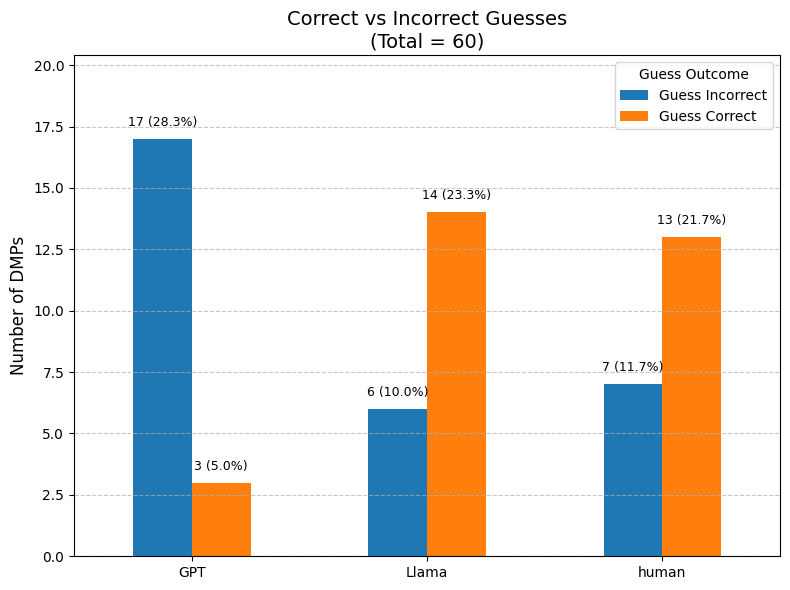

💾 Saved grouped bar chart to: ./plots\grouped_bar_accuracy_by_source.png


In [6]:
import os
import matplotlib.pyplot as plt

# --- Output directory (same as before) ---
OUT_DIR = "./plots"
os.makedirs(OUT_DIR, exist_ok=True)

# --- Prepare grouped data ---
# Count correct/incorrect for each source (Human, GPT, Llama)
acc_counts = (
    df.groupby("source")["is_correct"]
      .value_counts()
      .unstack(fill_value=0)
      .rename(columns={1: "Guess Correct", 0: "Guess Incorrect"})
      .sort_index()
)

print("\n📊 Accuracy counts by source (Human, GPT, Llama):")
print(acc_counts)

# --- Totals ---
total_responses = int(acc_counts.to_numpy().sum())

# --- Plot grouped bar chart (formatted like the last plot) ---
fig, ax = plt.subplots(figsize=(8, 6))
acc_counts.plot(kind="bar", ax=ax)  # default colors

ax.set_ylabel("Number of DMPs", fontsize=12)
ax.set_xlabel("")
ax.set_title(f"Correct vs Incorrect Guesses\n(Total = {total_responses})", fontsize=14)
ax.set_xticklabels(acc_counts.index, rotation=0)
ax.legend(title="Guess Outcome")

# Give extra headroom for labels
max_val = acc_counts.values.max() if total_responses > 0 else 1
ymax = max_val * 1.2
ax.set_ylim(0, ymax)

# Add count + percentage above each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            pct = (height / total_responses) * 100 if total_responses > 0 else 0
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + (ymax * 0.02),
                f"{int(height)} ({pct:.1f}%)",
                ha="center", va="bottom", fontsize=9
            )

ax.grid(axis="y", linestyle="--", alpha=0.7)
fig.tight_layout()

# --- Save, show, close ---
save_path = os.path.join(OUT_DIR, "grouped_bar_accuracy_by_source.png")
fig.savefig(save_path, dpi=300)
plt.show()
plt.close(fig)

print("💾 Saved grouped bar chart to:", save_path)


In [7]:

# ---------- Expand the JSON column ----------
rows = []
for _, r in df.iterrows():
    raw = r.get("evaluations", "")
    items = []
    if isinstance(raw, str) and raw.strip():
        try:
            items = json.loads(raw)
        except json.JSONDecodeError:
            # Clean up small formatting issues like trailing ellipses
            cleaned = re.sub(r"\.\.\.$", "", raw).strip()
            try:
                items = json.loads(cleaned)
            except Exception:
                items = []
    for it in items:
        rows.append({
            "id": r.get("id"),
            "participantId": r.get("participantId"),
            "dmpName": r.get("dmpName"),
            "overallAuthorshipGuess": r.get("overallAuthorshipGuess"),
            "overallSatisfaction": r.get("overallSatisfaction"),
            "elementTitle": it.get("elementTitle"),
            "selectedErrors": it.get("selectedErrors", []),
            "satisfactionScore": it.get("satisfactionScore"),
            "additionalComments": it.get("additionalComments", ""),
        })

# ---------- Create Expanded DataFrame ----------
expanded = pd.DataFrame(rows)

# ---------- Optional: Save to CSV ----------
expanded.to_csv(os.path.join(DATA_DIR, "expanded_evaluations.csv"), index=False)
expanded


,id,participantId,dmpName,overallAuthorshipGuess,overallSatisfaction,elementTitle,selectedErrors,satisfactionScore,additionalComments
0,cmf5ty7vf000f71010cu38kpq,1010,GPT_2,Human,4,Element 1: Data Type,[None--No errors seen],Very Satisfied,
1,cmf5ty7vf000f71010cu38kpq,1010,GPT_2,Human,4,"Element 2: Related Tools, Software and/or Code:",[None--No errors seen],Very Satisfied,
2,cmf5ty7vf000f71010cu38kpq,1010,GPT_2,Human,4,Element 3: Standards:,[None--No errors seen],Very Satisfied,
3,cmf5ty7vf000f71010cu38kpq,1010,GPT_2,Human,4,"Element 4: Data Preservation, Access, and Asso...",[None--No errors seen],Very Satisfied,
4,cmf5ty7vf000f71010cu38kpq,1010,GPT_2,Human,4,"Element 5: Access, Distribution, or Reuse Cons...",[None--No errors seen],Very Satisfied,
...,...,...,...,...,...,...,...,...,...
355,cmgf2bbon00057101uiqy4p1v,1015,Llama_8,LLM,2,"Element 2: Related Tools, Software and/or Code:",[Completeness--Missing something that is requi...,Dissatisfied,
356,cmgf2bbon00057101uiqy4p1v,1015,Llama_8,LLM,2,Element 3: Standards:,[None--No errors seen],Satisfied,
357,cmgf2bbon00057101uiqy4p1v,1015,Llama_8,LLM,2,"Element 4: Data Preservation, Access, and Asso...",[None--No errors seen],Satisfied,
358,cmgf2bbon00057101uiqy4p1v,1015,Llama_8,LLM,2,"Element 5: Access, Distribution, or Reuse Cons...",[Completeness--Missing something that is requi...,Dissatisfied,


In [8]:
# ============ Expand the JSON column ============
rows = []
for _, r in df.iterrows():
    raw = r.get("evaluations", "")
    items = []

    # Attempt to parse the JSON string
    if isinstance(raw, str) and raw.strip():
        try:
            items = json.loads(raw)
        except json.JSONDecodeError:
            # Handle trailing issues or malformed JSON
            cleaned = re.sub(r"\.\.\.$", "", raw).strip()
            try:
                items = json.loads(cleaned)
            except Exception:
                items = []

    # Extract fields from each item in the JSON list
    for it in items:
        rows.append({
            "id": r.get("id"),
            "participantId": r.get("participantId"),
            "dmpName": r.get("dmpName"),
            "overallAuthorshipGuess": r.get("overallAuthorshipGuess"),
            "overallSatisfaction": r.get("overallSatisfaction"),
            "elementTitle": it.get("elementTitle", None),
            "selectedErrors": it.get("selectedErrors", []),
            "satisfactionScore": it.get("satisfactionScore", None),
            "additionalComments": it.get("additionalComments", ""),
        })

# ============ Convert to DataFrame ============
expanded = pd.DataFrame(rows)

# ============ Map satisfaction to ordinal ============
sat_map = {
    "Very Dissatisfied": 1,
    "Dissatisfied": 2,
    "Neither dissatisfied or satisfied": 3,
    "Satisfied": 4,
    "Very Satisfied": 5,
}
expanded["satisfactionOrdinal"] = expanded["satisfactionScore"].map(sat_map)

expanded

,id,participantId,dmpName,overallAuthorshipGuess,overallSatisfaction,elementTitle,selectedErrors,satisfactionScore,additionalComments,satisfactionOrdinal
0,cmf5ty7vf000f71010cu38kpq,1010,GPT_2,Human,4,Element 1: Data Type,[None--No errors seen],Very Satisfied,,5.0
1,cmf5ty7vf000f71010cu38kpq,1010,GPT_2,Human,4,"Element 2: Related Tools, Software and/or Code:",[None--No errors seen],Very Satisfied,,5.0
2,cmf5ty7vf000f71010cu38kpq,1010,GPT_2,Human,4,Element 3: Standards:,[None--No errors seen],Very Satisfied,,5.0
3,cmf5ty7vf000f71010cu38kpq,1010,GPT_2,Human,4,"Element 4: Data Preservation, Access, and Asso...",[None--No errors seen],Very Satisfied,,5.0
4,cmf5ty7vf000f71010cu38kpq,1010,GPT_2,Human,4,"Element 5: Access, Distribution, or Reuse Cons...",[None--No errors seen],Very Satisfied,,5.0
...,...,...,...,...,...,...,...,...,...,...
355,cmgf2bbon00057101uiqy4p1v,1015,Llama_8,LLM,2,"Element 2: Related Tools, Software and/or Code:",[Completeness--Missing something that is requi...,Dissatisfied,,2.0
356,cmgf2bbon00057101uiqy4p1v,1015,Llama_8,LLM,2,Element 3: Standards:,[None--No errors seen],Satisfied,,4.0
357,cmgf2bbon00057101uiqy4p1v,1015,Llama_8,LLM,2,"Element 4: Data Preservation, Access, and Asso...",[None--No errors seen],Satisfied,,4.0
358,cmgf2bbon00057101uiqy4p1v,1015,Llama_8,LLM,2,"Element 5: Access, Distribution, or Reuse Cons...",[Completeness--Missing something that is requi...,Dissatisfied,,2.0


In [9]:
import os
import re
import ast
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === Output directory ===
OUT_DIR = "./plots"
os.makedirs(OUT_DIR, exist_ok=True)

# === Helper functions ===
def make_element_short(s):
    if pd.isna(s): return None
    m = re.search(r'(?i)\b(elem(?:ent|n|nt)?)\s*(\d+)', str(s))
    return f"Element {m.group(2)}" if m else None

def element_order_key(x):
    if not isinstance(x, str): return 1_000_000
    m = re.search(r'Element\s+(\d+)', x)
    return int(m.group(1)) if m else 1_000_000

def parse_errors(x):
    if isinstance(x, list): return x
    if pd.isna(x) or str(x).strip() == "": return []
    try:
        v = json.loads(str(x))
        return v if isinstance(v, list) else [str(v)]
    except:
        try:
            v = ast.literal_eval(str(x))
            return v if isinstance(v, list) else [str(v)]
        except:
            return [str(x)]

def clean_error_list(lst):
    keep = []
    for e in lst:
        s = str(e).strip()
        if re.fullmatch(r'(?i)none(\s*--.*)?', s): continue
        if re.fullmatch(r'(?i)no\s*errors?\s*seen', s): continue
        keep.append(s)
    return keep

def simplify_error_label(lbl):
    return str(lbl).split("--", 1)[0].strip()

def extract_model(dmp):
    if pd.isna(dmp): return "Unknown"
    s = str(dmp).split("_")[0].strip().lower()
    if s == "gpt": return "GPT"
    elif s == "llama": return "Llama"
    elif s == "human": return "Human"
    return "Unknown"

def contrast_color(val_pct, cmap, norm):
    r, g, b, _ = cmap(norm(val_pct))
    lum = 0.299*r + 0.587*g + 0.114*b
    return "black" if lum > 0.6 else "white"

# === Preprocessing (assume `expanded` is already loaded) ===
expanded["elementShort"] = expanded["elementTitle"].apply(make_element_short)
expanded["parsedErrors"] = expanded["selectedErrors"].apply(parse_errors).apply(clean_error_list)
expanded["model"] = expanded["dmpName"].apply(extract_model)

# === Group-by-model analysis ===
model_types = ["GPT", "Llama", "Human"]

for model in model_types:
    print(f"\n=== MODEL: {model} ===")
    df_model = expanded[expanded["model"] == model].copy()

    # --- Explode errors ---
    err_exp = (
        df_model
        .explode("parsedErrors")
        .assign(errorSimple=lambda d: d["parsedErrors"].fillna("").astype(str).map(simplify_error_label))
    )
    err_exp = err_exp[
        err_exp["errorSimple"].str.strip().ne("") &
        err_exp["errorSimple"].str.lower().ne("none")
    ]

    # --- Error counts ---
    error_counts = (
        err_exp
        .groupby(["elementShort", "errorSimple"], dropna=False)
        .size()
        .reset_index(name="count")
    )
    error_counts["__ord"] = error_counts["elementShort"].map(element_order_key)
    error_counts = error_counts.sort_values(["__ord", "count"], ascending=[True, False]).drop(columns="__ord")
    error_counts.to_csv(os.path.join(OUT_DIR, f"error_counts_{model}.csv"), index=False)

    # --- Error matrix ---
    error_matrix = (
        error_counts
        .pivot(index="errorSimple", columns="elementShort", values="count")
        .fillna(0)
        .astype(int)
    )
    error_matrix = error_matrix[sorted(error_matrix.columns, key=element_order_key)]
    error_matrix = error_matrix.sort_index()
    error_matrix.to_csv(os.path.join(OUT_DIR, f"error_matrix_{model}.csv"))

    # --- Satisfaction stats ---
    sat_stats = (
        df_model
        .dropna(subset=["elementShort", "satisfactionOrdinal"])
        .groupby("elementShort", as_index=False)["satisfactionOrdinal"]
        .agg(mean="mean", std="std", n="count", median="median")
    )
    sat_stats["__ord"] = sat_stats["elementShort"].map(element_order_key)
    sat_stats = sat_stats.sort_values("__ord").drop(columns="__ord").reset_index(drop=True)
    sat_stats.to_csv(os.path.join(OUT_DIR, f"satisfaction_stats_{model}.csv"), index=False)

    # --- Summary with top 3 errors ---
    top_errors = (
        error_counts
        .groupby("elementShort", as_index=False)
        .apply(lambda g: ", ".join(g.sort_values("count", ascending=False)
                                     .head(3)["errorSimple"].tolist()))
        .reset_index(drop=True)
        .rename(columns={0: "topErrors"})
    )
    summary = sat_stats.merge(top_errors, on="elementShort", how="left")
    summary.to_csv(os.path.join(OUT_DIR, f"element_summary_{model}.csv"), index=False)

    # === HEATMAP ===
    col_totals = error_matrix.sum(axis=0).replace(0, np.nan)
    pct_matrix = (error_matrix.div(col_totals, axis=1) * 100).fillna(0)

    # Filter non-zero errors only
    mask_nonzero = error_matrix.sum(axis=1) > 0
    error_matrix = error_matrix.loc[mask_nonzero]
    pct_matrix = pct_matrix.loc[mask_nonzero]

    # --- Plot ---
    plt.figure(figsize=(12, max(6, 0.3 * len(error_matrix.index))))
    im = plt.imshow(pct_matrix.values, aspect="auto", cmap='viridis')
    plt.colorbar(label="Percent of Errors (%)")
    plt.xticks(range(pct_matrix.shape[1]), pct_matrix.columns, rotation=0)
    plt.yticks(range(pct_matrix.shape[0]), error_matrix.index)
    plt.title(f"Error Distribution per Element – {model}")

    cmap = im.get_cmap()
    norm = im.norm
    for r in range(pct_matrix.shape[0]):
        for c in range(pct_matrix.shape[1]):
            cnt = int(error_matrix.iat[r, c])
            if cnt > 0:
                pct = float(pct_matrix.iat[r, c])
                txt = f"{pct:.0f}%\n({cnt})"
                plt.text(c, r, txt, ha="center", va="center", fontsize=8, color=contrast_color(pct, cmap, norm))

    plt.tight_layout()
    plt.savefig(os.path.join(OUT_DIR, f"error_percent_heatmap_{model}.png"), dpi=150)
    plt.close()

# === Comparison table like your Word screenshot ===

element_labels = {
    "Element 1": "Types and Amount of Scientific Data; Data to be Preserved and Shared; Metadata and Documentation",
    "Element 2": "Tools, Software, and Code",
    "Element 3": "Standards",
    "Element 4": "Repository, Findability, and Availability Timeline",
    "Element 5": "Access, Distribution, Reuse, Controlled Access, Privacy, and Confidentiality",
    "Element 6": "Oversight of DMP"
}

# Load satisfaction stats and merge
all_stats = []
for model in model_types:
    path = os.path.join(OUT_DIR, f"satisfaction_stats_{model}.csv")
    df = pd.read_csv(path)
    df["model"] = model
    all_stats.append(df)

df_all = pd.concat(all_stats, ignore_index=True)
df_all["mean_std"] = df_all.apply(lambda r: f"{r['mean']:.1f}±{r['std']:.2f}", axis=1)

# Pivot to wide
table = df_all.pivot(index="elementShort", columns="model", values="mean_std").reset_index()
table.insert(1, "elementField", table["elementShort"].map(element_labels))
table = table.sort_values("elementShort", key=lambda col: col.map(element_order_key))

# Rename for clarity
table.columns.name = None
table = table.rename(columns={
    "elementShort": "elementNumber",
    "Llama": "Llama 3.3",
    "GPT": "GPT 4.1",
    "Human": "Human"
})

# Save
final_path = os.path.join(OUT_DIR, "satisfaction_comparison_table.csv")
table.to_csv(final_path, index=False)
print("\n✅ Saved satisfaction comparison table to:", final_path)



=== MODEL: GPT ===


C:\Users\Nahid\AppData\Local\Temp\ipykernel_29208\1111496166.py:122: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: ", ".join(g.sort_values("count", ascending=False)



=== MODEL: Llama ===


C:\Users\Nahid\AppData\Local\Temp\ipykernel_29208\1111496166.py:122: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: ", ".join(g.sort_values("count", ascending=False)



=== MODEL: Human ===


C:\Users\Nahid\AppData\Local\Temp\ipykernel_29208\1111496166.py:122: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: ", ".join(g.sort_values("count", ascending=False)



✅ Saved satisfaction comparison table to: ./plots\satisfaction_comparison_table.csv


In [114]:
# ============================================================
# Survey Analysis (Publication-Ready Enhanced View)
# ============================================================

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# --- File paths ---
DATA_DIR = "./data"
BG_FILE = os.path.join(DATA_DIR, "data-1759775270018.csv")
EVAL_FILE = os.path.join(DATA_DIR, "data-1759774391562.csv")
OUT_DIR = os.path.join(DATA_DIR, "filtered_analysis_pub")
os.makedirs(OUT_DIR, exist_ok=True)

# --- Load data ---
background_df = pd.read_csv(BG_FILE)
eval_df = pd.read_csv(EVAL_FILE)

# --- Drop null participants and extract valid participant IDs ---
background_df = background_df.dropna(subset=["participantId"])
eval_ids = eval_df["participantId"].dropna().unique()

# --- Filter background based on evaluation participants ---
df = background_df[background_df["participantId"].isin(eval_ids)].copy()
print(f"✅ Filtered participants: {df['participantId'].nunique()}")



✅ Filtered participants: 20


In [115]:
# ============================================================
# Categorize `field` into broader, survey-aligned research areas
# ============================================================

# --- Define controlled field groups (as in your survey form) ---
field_category_map = {
    # 1️⃣ Library and Information Science
    "library science": "Library & Information Science",
    "library and information science": "Library & Information Science",
    "library information science": "Library & Information Science",
    "information science": "Library & Information Science",

    # 2️⃣ Biological and Life Sciences
    "biology": "Biological & Life Sciences",
    "biological sciences": "Biological & Life Sciences",
    "biological science": "Biological & Life Sciences",
    "life sciences": "Biological & Life Sciences",
    "biochemistry": "Biological & Life Sciences",
    "microbiology": "Biological & Life Sciences",
    "marine science": "Biological & Life Sciences",
    "biomedical sciences": "Biological & Life Sciences",

    # 3️⃣ STEM Fields (Physical sciences, computing, engineering, etc.)
    "stem": "STEM Fields",
    "engineering": "STEM Fields",
    "computer science": "STEM Fields",
    "physics": "STEM Fields",
    "mathematics": "STEM Fields",
    "neuroscience": "STEM Fields",
    "chemistry": "STEM Fields",
    "informatics": "STEM Fields",
    "data science": "STEM Fields",

    # 4️⃣ Social Sciences
    "social science": "Social Sciences",
    "social sciences": "Social Sciences",
    "psychology": "Social Sciences",
    "sociology": "Social Sciences",
    "anthropology": "Social Sciences",
    "education": "Social Sciences",
    "economics": "Social Sciences",
    "political science": "Social Sciences",

    # 5️⃣ Other
    "other": "Other",
}


def categorize_field(value):
    """
    Map each free-text 'field' entry into standardized categories.
    Handles multiple combined entries like:
      "Library Science, Biology" → "Library & Information Science, Biological & Life Sciences"
    """
    if pd.isna(value):
        return np.nan

    text = str(value).strip().lower()
    text = re.sub(r"\s+", " ", text)
    parts = re.split(r",|;|/|\|", text)

    mapped = set()
    for p in parts:
        p = p.strip()
        if not p:
            continue
        # Match by known controlled terms
        if p in field_category_map:
            mapped.add(field_category_map[p])
        else:
            # Try partial match (e.g., "molecular biology" → "Biological & Life Sciences")
            found = False
            for k, v in field_category_map.items():
                if k in p:
                    mapped.add(v)
                    found = True
                    break
            if not found:
                mapped.add(p.title())  # keep custom entries readable

    return ", ".join(sorted(mapped)) if mapped else np.nan


df["fieldCategory"] = df["field"].apply(categorize_field)

# =================== sanity checks ===================
print("\n✅ Sample categorized `fieldCategory` values:")
print(df[["field", "fieldCategory"]].head(10))



✅ Sample categorized `fieldCategory` values:
                              field                  fieldCategory
0   library and information science  Library & Information Science
1                   Library Science  Library & Information Science
2                  Library science   Library & Information Science
4                           Biology     Biological & Life Sciences
5                   Library science  Library & Information Science
6                   Library Science  Library & Information Science
7                              STEM                    STEM Fields
9                   library science  Library & Information Science
10                          Biology     Biological & Life Sciences
11                     Neuroscience                    STEM Fields


In [119]:
# ============================================================
# Categorize `roles` (Auto-normalized and Survey-Aligned)
# ============================================================

import re
import ast
import numpy as np
import pandas as pd

# ---------- Helper: find 'otherRole' column ----------
def find_col_case_insensitive(df, candidates, allow_fuzzy=True):
    if not isinstance(candidates, (list, tuple, set)):
        candidates = [candidates]
    cand_lower = {str(c).lower() for c in candidates}

    for col in df.columns:
        if str(col).lower() in cand_lower:
            return col

    if allow_fuzzy:
        norm = lambda s: re.sub(r"[^a-z0-9]", "", str(s).lower())
        col_map = {norm(col): col for col in df.columns}
        for c in cand_lower:
            if norm(c) in col_map:
                return col_map[norm(c)]
        for col in df.columns:
            lc = str(col).lower()
            if "other" in lc and "role" in lc:
                return col
    return None


# ---------- Survey categories ----------
CATEGORIES = {
    "Researcher": "Researcher (e.g., student, faculty, post-doctoral)",
    "Admin": "Research administrator / Program officer",
    "DataMgr": "Data manager / Data steward",
    "Librarian": "Librarian / Data librarian / Research support staff",
    "Other": "Other",
}


def token_is_other(tok):
    if not isinstance(tok, str):
        return False
    t = re.sub(r"\(.*?\)", "", tok.strip().lower())
    return t.startswith("other")


def replace_other_with_text(roles_list, other_text):
    if not isinstance(roles_list, list):
        return roles_list
    new_roles = []
    for r in roles_list:
        if token_is_other(r):
            if other_text and isinstance(other_text, str) and other_text.strip():
                new_roles.append(f"Other: {other_text.strip().title()}")
            else:
                new_roles.append("Other (unspecified)")
        else:
            new_roles.append(r)
    return sorted(set(new_roles))


# ---------- Auto-normalize the roles column ----------
def normalize_roles(value):
    """Ensure we always get a list of lowercase role strings."""
    if isinstance(value, list):
        return [str(v).strip() for v in value if str(v).strip()]

    if isinstance(value, str):
        val = value.strip()
        # Try parsing list-like strings (e.g., "['faculty','student']")
        try:
            parsed = ast.literal_eval(val)
            if isinstance(parsed, list):
                return [str(v).strip() for v in parsed if str(v).strip()]
        except Exception:
            pass
        # Split by common delimiters
        parts = re.split(r"[;,/]+", val)
        return [p.strip() for p in parts if p.strip()]

    return []


# ---------- Integrate 'otherRole' column if exists ----------
other_role_col = find_col_case_insensitive(df, ["otherrole", "otherRole", "roleOther", "rolesOther"])

df["roles_normalized"] = df["roles"].apply(normalize_roles)

if other_role_col:
    df["roles_normalized"] = df.apply(
        lambda row: replace_other_with_text(row["roles_normalized"], row[other_role_col]),
        axis=1,
    )
    print(f"✅ Using 'Other role' column: {other_role_col}")
else:
    print("⚠️ No 'otherRole' column found — proceeding without replacement.")


# ---------- Categorize roles ----------
def categorize_role(role_list):
    if not role_list or not isinstance(role_list, list):
        return np.nan

    mapped = set()
    for r in role_list:
        if not isinstance(r, str):
            continue
        rl = r.lower().strip()

        if any(x in rl for x in ["researcher", "student", "faculty", "post"]):
            mapped.add(CATEGORIES["Researcher"])
        elif any(x in rl for x in ["administrator", "program officer", "program manager"]):
            mapped.add(CATEGORIES["Admin"])
        elif any(x in rl for x in ["data manager", "data steward"]):
            mapped.add(CATEGORIES["DataMgr"])
        elif any(x in rl for x in ["librarian", "research support"]):
            mapped.add(CATEGORIES["Librarian"])
        elif token_is_other(r):
            mapped.add(r if ":" in r else CATEGORIES["Other"])
        else:
            mapped.add(CATEGORIES["Other"])  # fallback if truly unrecognized

    return ", ".join(sorted(mapped)) if mapped else np.nan


df["roleCategory"] = df["roles_normalized"].apply(categorize_role)

# ---------- Check results ----------
print("\n✅ Sample categorized roles:")
print(df[["roles", "roles_normalized", "roleCategory"]].head(10))
df

✅ Using 'Other role' column: otherRole

✅ Sample categorized roles:
                                                roles  \
0   {"Librarian / Data librarian / Research suppor...   
1   {"Librarian / Data librarian / Research suppor...   
2   {"Librarian / Data librarian / Research suppor...   
4   {"Librarian / Data librarian / Research suppor...   
5   {"Librarian / Data librarian / Research suppor...   
6                     {"Data manager / Data steward"}   
7   {"Librarian / Data librarian / Research suppor...   
9   {"Librarian / Data librarian / Research suppor...   
10  {"Librarian / Data librarian / Research suppor...   
11                    {"Data manager / Data steward"}   

                                     roles_normalized  \
0   [Data librarian, Research support staff"}, {"L...   
1   [Data librarian, Research support staff"}, {"L...   
2   [Data librarian, Research support staff"}, {"L...   
4   [Data librarian, Research support staff"}, {"L...   
5   [Data librarian

,id,participantId,field,roles,otherRole,roleDuration,dmpCount,dmpReviewFrequency,dmsFamiliarity,aiUsage,aiComfort,aiAttitude,additionalComments,createdAt,updatedAt,fieldCategory,roleCategory,roles_normalized
0,cmffjpg2b00167101b51978ta,1038,library and information science,"{""Librarian / Data librarian / Research suppor...",NaN,More than 10 years,NaN,Every few months,Somewhat familiar,Occasionally/Sometimes,Somewhat comfortable,Neutral toward it,generative AI might lead toward more compliant...,2025-09-11 15:10:37.715,2025-09-11 15:10:37.715,Library & Information Science,Librarian / Data librarian / Research support ...,"[Data librarian, Research support staff""}, {""L..."
1,cmffoabnq001a7101dmvjxzwt,1036,Library Science,"{""Librarian / Data librarian / Research suppor...",NaN,More than 10 years,NaN,Every few months,Extremely familiar,Never,Slightly comfortable,Neutral toward it,NaN,2025-09-11 17:18:50.246,2025-09-11 17:18:50.246,Library & Information Science,Librarian / Data librarian / Research support ...,"[Data librarian, Research support staff""}, {""L..."
2,cmffwon61001e7101ib7q39iw,1052,Library science,"{""Librarian / Data librarian / Research suppor...",NaN,1–3 years,NaN,Once or twice a year,Moderately familiar,Never,Slightly comfortable,Neutral toward it,NaN,2025-09-11 21:13:55.273,2025-09-11 21:13:55.273,Library & Information Science,Librarian / Data librarian / Research support ...,"[Data librarian, Research support staff""}, {""L..."
4,cmfkbw8y3001j71014ppvm6mj,1005,Biology,"{""Librarian / Data librarian / Research suppor...",NaN,4–6 years,More than 5,Weekly or more often,Extremely familiar,Occasionally/Sometimes,Somewhat comfortable,Very in favor of it,"It can be useful, but manual follow-up is nece...",2025-09-14 23:30:49.036,2025-09-14 23:30:49.036,Biological & Life Sciences,Librarian / Data librarian / Research support ...,"[Data librarian, Research support staff""}, {""L..."
5,cmflahp4g001n7101lyi8ctet,1011,Library science,"{""Librarian / Data librarian / Research suppor...",NaN,7–10 years,More than 5,About once a month,Extremely familiar,Occasionally/Sometimes,Slightly comfortable,Neutral toward it,It seems like a great time-saver for researche...,2025-09-15 15:39:16.72,2025-09-15 15:39:16.72,Library & Information Science,Librarian / Data librarian / Research support ...,"[Data librarian, Research support staff""}, {""L..."
6,cmfll2wqr001r71011f1h07rl,1008,Library Science,"{""Data manager / Data steward""}",NaN,1–3 years,More than 5,About once a month,Moderately familiar,Occasionally/Sometimes,Moderately comfortable,Somewhat in favor of it,Can be used as collaborative tool to improve c...,2025-09-15 20:35:42.532,2025-09-15 20:35:42.532,Library & Information Science,Data manager / Data steward,"[Data steward""}, {""Data manager]"
7,cmfojjgaz001v71011koj25q2,1019,STEM,"{""Librarian / Data librarian / Research suppor...",NaN,Less than 1 year,NaN,Every few months,Somewhat familiar,Never,Slightly comfortable,Somewhat against it,NaN,2025-09-17 22:15:53.675,2025-09-17 22:15:53.675,STEM Fields,Librarian / Data librarian / Research support ...,"[Data librarian, Research support staff""}, {""L..."
9,cmfwtmbvy00207101z0vkonbw,1044,library science,"{""Librarian / Data librarian / Research suppor...",NaN,7–10 years,NaN,About once a month,Extremely familiar,Never,Slightly comfortable,Somewhat in favor of it,NaN,2025-09-23 17:20:13.486,2025-09-23 17:20:13.486,Library & Information Science,Librarian / Data librarian / Research support ...,"[Data librarian, Research support staff""}, {""L..."
10,cmf5tb6x6000d71019dnurkjf,1010,Biology,"{""Librarian / Data librarian / Research suppor...",NaN,4–6 years,2–3,About once a month,Extremely familiar,Never,Slightly comfortable,Somewhat against it,NaN,2025-09-04 19:41:47.082,2025-09-04 19:41:47.082,Biological & Life Sciences,Librarian / Data librarian / Research support ...,"[Data librarian, Research support staff""}, {""L..."
11,cmf5x35p5000h7101m39k829v,1014,Neuroscience,"{""Data mana

In [120]:



# ============================================================
# Plot Styling
# ============================================================

plt.style.use("seaborn-v0_8-whitegrid")
PLOT_COLOR = "#4C72B0"  # Professional blue
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 11,
    "axes.titlesize": 13,
    "axes.labelsize": 11,
})

# ============================================================
# Helper Function for Bar Plots
# ============================================================

def make_bar_plot(series, title, xlabel, filename):
    """
    Create a horizontal bar plot from a pandas Series.
    - Ignores NaN or empty strings
    - Adds count and percentage labels
    - Saves plot in OUT_DIR
    """
    series = series.dropna()
    series = series[series.astype(str).str.strip() != ""]
    if series.empty:
        print(f"⚠️ Skipped {filename} (no valid data)")
        return

    counts = series.value_counts().sort_values(ascending=True)
    total = counts.sum()
    percentages = counts / total * 100

    cmap = plt.cm.Blues
    colors = cmap(np.linspace(0.4, 0.8, len(counts)))

    fig, ax = plt.subplots(figsize=(7, 4))
    ax.barh(counts.index, counts.values, color=colors, edgecolor="black", height=0.6)

    # Add labels
    for i, (v, pct) in enumerate(zip(counts.values, percentages.values)):
        ax.text(v + max(counts.values) * 0.01, i, f"{int(v)}  ({pct:.1f}%)",
                va="center", fontsize=9, color="black")

    ax.set_title(title, fontweight="bold", pad=10)
    ax.set_xlabel(xlabel)
    ax.set_xlim(0, max(counts.values) * 1.3)
    ax.tick_params(axis="y", labelsize=9)
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)

    plt.tight_layout()
    plt.savefig(os.path.join(OUT_DIR, filename), dpi=400, bbox_inches="tight")
    plt.close()
    print(f"📊 Saved polished plot: {filename}")


In [123]:
# ============================================================
# Helper for Multi-Category Expansion (Final Integrated Version)
# ============================================================

import re
import pandas as pd
import os

def explode_multicategories(series: pd.Series, group_other: bool = False) -> pd.Series:
    """
    Expand multi-category strings into individual normalized items.

    Handles:
      - Multiple values per row (comma, semicolon, slash, or pipe separated)
      - Variants of 'Other' such as 'Other:', 'Other (please specify)', etc.
      - Works safely with NaNs, empty strings, and mixed data types.

    Parameters
    ----------
    series : pd.Series
        Column containing category values (e.g., df["roleCategory"]).
    group_other : bool, default=False
        - If True: all 'Other: ...' → 'Other (specified)'
        - If False: preserve 'Other: Data Analyst' as-is.

    Returns
    -------
    pd.Series
        Flattened Series with one value per row, suitable for value_counts() or plotting.
    """
    expanded = []

    for val in series.dropna():
        if not isinstance(val, str):
            continue

        # Split on commas, semicolons, slashes, or pipes
        parts = re.split(r"[;,/|]+", val)
        for p in parts:
            p = p.strip()
            if not p:
                continue

            low = p.lower()

            # Handle "Other: Something"
            if low.startswith("other:"):
                if group_other:
                    expanded.append("Other (specified)")
                else:
                    # Keep case of prefix consistent
                    expanded.append("Other: " + p.split(":", 1)[-1].strip().title())

            # Handle bare 'Other' or 'Other (please specify)'
            elif re.match(r"^other(\b|$|\s|\()", low):
                expanded.append("Other (unspecified)")

            else:
                expanded.append(p.strip())

    return pd.Series(expanded, dtype="object") if expanded else pd.Series(dtype="object")


# ============================================================
# Section 1: About You
# ============================================================

# --- 1.1 Primary Field or Discipline ---
if "fieldCategory" in df.columns:
    make_bar_plot(
        explode_multicategories(df["fieldCategory"], group_other=True),
        "1.1 Primary Field or Discipline",
        "Number of Participants",
        "1_1_field.png"
    )
else:
    print("⚠️ 'fieldCategory' column not found — skipping 1.1 Field plot.")

# --- 1.2 Current Role(s) — Collapsed into 5 Original Survey Categories ---
if "roleCategory" in df.columns:
    # Step 1. Flatten roles (handles comma/semicolon-separated entries)
    role_series = explode_multicategories(df["roleCategory"], group_other=False)

    # Step 2. Collapse fine-grained roles into 5 canonical groups
    def collapse_role_category(r):
        rl = str(r).lower().strip()
        if any(x in rl for x in ["researcher", "student", "faculty", "post"]):
            return "Researcher (e.g., student, faculty, post-doctoral)"
        elif any(x in rl for x in ["administrator", "program officer"]):
            return "Research administrator / Program officer"
        elif any(x in rl for x in ["data manager", "data steward"]):
            return "Data manager / Data steward"
        elif any(x in rl for x in ["librarian", "research support"]):
            return "Librarian / Data librarian / Research support staff"
        elif "other" in rl:
            return "Other"
        else:
            return "Other"

    grouped_roles = role_series.map(collapse_role_category)

    # Step 3. Verify that only 5 unique categories exist
    print("✅ Unique categories after collapsing:")
    print(grouped_roles.value_counts())

    # Step 4. Plot the clean, aggregated version
    make_bar_plot(
        grouped_roles,
        "1.2 Current Role(s)",
        "Number of Participants",
        "1_2_roles_grouped.png"
    )
else:
    print("⚠️ 'roleCategory' column not found — skipping 1.2 Role plot.")


# --- 1.3 Experience Duration ---
if "roleDuration" in df.columns:
    make_bar_plot(
        df["roleDuration"],
        "1.3 Experience Duration",
        "Number of Participants",
        "1_3_role_duration.png"
    )
else:
    print("⚠️ 'roleDuration' column not found — skipping 1.3 Experience plot.")


# ============================================================
# Section 2: Experience with DMPs
# ============================================================

for col, title, fname in [
    ("dmpCount", "2.1 Number of DMPs Authored or Co-authored", "2_1_dmp_count.png"),
    ("dmpReviewFrequency", "2.2 Frequency of Reviewing DMPs", "2_2_dmp_review_frequency.png"),
    ("dmsFamiliarity", "2.3 Familiarity with NIH Data Management and Sharing Plan (DMSP)", "2_3_dms_familiarity.png"),
]:
    if col in df.columns:
        make_bar_plot(df[col], title, "Number of Participants", fname)
    else:
        print(f"⚠️ Column '{col}' not found — skipping plot {fname}.")


# ============================================================
# Section 3: Attitudes Toward AI
# ============================================================

for col, title, fname in [
    ("aiUsage", "3.1 Frequency of Using AI Tools (ChatGPT, Copilot, etc.)", "3_1_ai_usage.png"),
    ("aiComfort", "3.2 Comfort Level Using AI to Assist in DMP Writing", "3_2_ai_comfort.png"),
    ("aiAttitude", "3.3 General Attitude Toward AI in Research Workflows", "3_3_ai_attitude.png"),
]:
    if col in df.columns:
        make_bar_plot(df[col], title, "Number of Participants", fname)
    else:
        print(f"⚠️ Column '{col}' not found — skipping plot {fname}.")


# ============================================================
# Section 4: Additional Comments on AI
# ============================================================

comments_path = os.path.join(OUT_DIR, "3_4_ai_comments.txt")
comments = df.get("additionalComments")

if comments is not None and not comments.dropna().empty:
    with open(comments_path, "w", encoding="utf-8") as f:
        f.write("=== 3.4 Additional Comments on Generative AI ===\n\n")
        for c in comments.dropna():
            text = c.strip()
            if text:
                f.write(f"- {text}\n")
    print(f"📝 Saved comments: {comments_path}")
else:
    print("⚠️ No additional comments found.")

print("\n✅ Publication-ready survey analysis completed.")
print(f"📁 All results saved in: {OUT_DIR}")


📊 Saved polished plot: 1_1_field.png
✅ Unique categories after collapsing:
Librarian / Data librarian / Research support staff    45
Data manager / Data steward                            12
Researcher (e.g., student, faculty, post-doctoral)      4
Research administrator / Program officer                2
Other                                                   1
Name: count, dtype: int64
📊 Saved polished plot: 1_2_roles_grouped.png
📊 Saved polished plot: 1_3_role_duration.png
📊 Saved polished plot: 2_1_dmp_count.png
📊 Saved polished plot: 2_2_dmp_review_frequency.png
📊 Saved polished plot: 2_3_dms_familiarity.png
📊 Saved polished plot: 3_1_ai_usage.png
📊 Saved polished plot: 3_2_ai_comfort.png
📊 Saved polished plot: 3_3_ai_attitude.png
📝 Saved comments: ./data\filtered_analysis_pub\3_4_ai_comments.txt

✅ Publication-ready survey analysis completed.
📁 All results saved in: ./data\filtered_analysis_pub



📊 Sentiment Summary:
count    10.000000
mean      0.174968
std       0.174528
min      -0.071429
25%       0.027083
50%       0.187500
75%       0.290000
max       0.450000
Name: sentiment, dtype: float64
✅ Saved: ./plots\sentiment_summary.csv


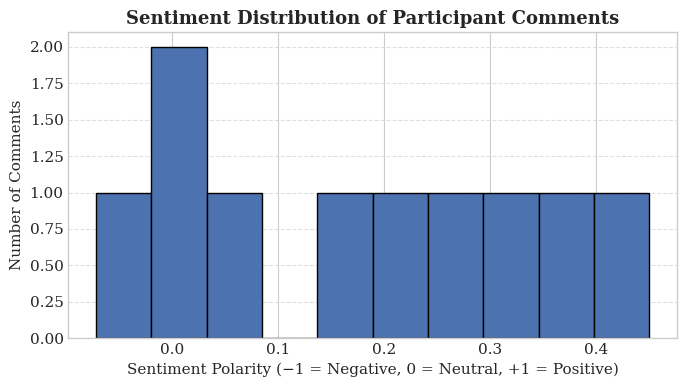


🧾 Sentiment Category Counts:
sentiment_category
Positive    6
Neutral     4
Name: count, dtype: int64


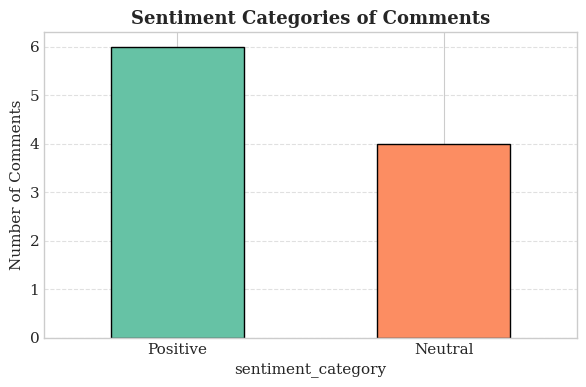

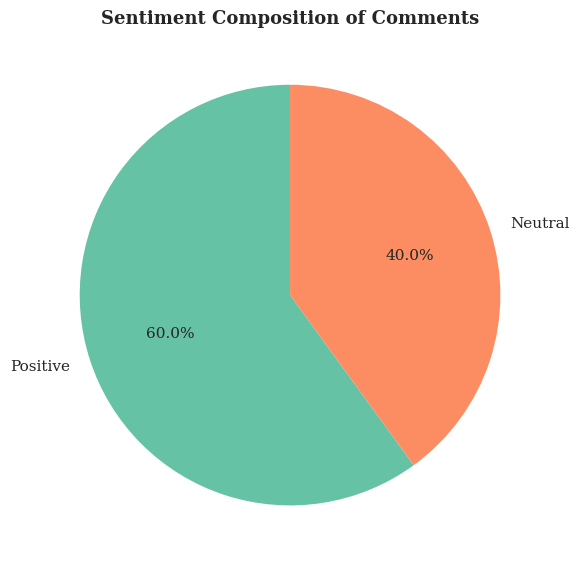

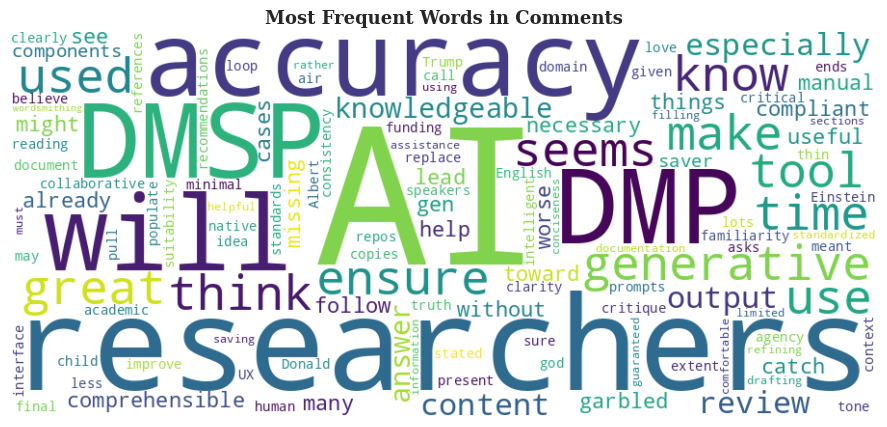


💬 Example of most positive comment:
I'm more comfortable with using generative AI for DMP review rather than drafting DMPs. 
(Sentiment = 0.450)

💬 Example of most negative comment:
My use of AI has been limited to refining answers for conciseness and wordsmithing. 
(Sentiment = -0.071)
✅ Saved: ./plots\sentiment_comments.csv

✅ Sentiment analysis complete. Results saved to: ./plots


In [124]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud

# ==============================
# Set up output directory
# ==============================
OUT_DIR = "./plots"
os.makedirs(OUT_DIR, exist_ok=True)

# ==============================
# Safe CSV Save Function
# ==============================
def safe_save_csv(df, filename):
    try:
        df.to_csv(filename, index=False)
        print(f"✅ Saved: {filename}")
    except PermissionError:
        alt = filename.replace(".csv", "_new.csv")
        print(f"⚠️ File locked. Saving as: {alt}")
        df.to_csv(alt, index=False)

# ==============================
# Extract Comments & Compute Sentiment
# ==============================
comments = df["additionalComments"].dropna().astype(str).tolist()
sentiments = [TextBlob(comment).sentiment.polarity for comment in comments]

df_sentiment = pd.DataFrame({
    "comment": comments,
    "sentiment": sentiments
})

# Optional: Bring in group info if exists
if "dmpName" in df.columns:
    df_sentiment["dmpName"] = df.loc[df["additionalComments"].dropna().index, "dmpName"].values
if "modelType" in df.columns:
    df_sentiment["modelType"] = df.loc[df["additionalComments"].dropna().index, "modelType"].values

# ==============================
# Summary Statistics Table
# ==============================
print("\n📊 Sentiment Summary:")
summary_stats = df_sentiment["sentiment"].describe()
print(summary_stats)

summary_path = os.path.join(OUT_DIR, "sentiment_summary.csv")
safe_save_csv(summary_stats.to_frame(), summary_path)

# ==============================
# Histogram: Full Sentiment Range
# ==============================
plt.figure(figsize=(7, 4))
plt.hist(df_sentiment["sentiment"], bins=10, color="#4C72B0", edgecolor="black")
plt.title("Sentiment Distribution of Participant Comments", fontweight="bold")
plt.xlabel("Sentiment Polarity (−1 = Negative, 0 = Neutral, +1 = Positive)")
plt.ylabel("Number of Comments")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "sentiment_distribution.png"), dpi=300)
plt.show()

# ==============================
# Categorize Sentiment
# ==============================
def categorize_sentiment(score):
    if score > 0.1:
        return "Positive"
    elif score < -0.1:
        return "Negative"
    else:
        return "Neutral"

df_sentiment["sentiment_category"] = df_sentiment["sentiment"].apply(categorize_sentiment)

# ==============================
# Bar Chart: Positive / Neutral / Negative
# ==============================
category_counts = df_sentiment["sentiment_category"].value_counts()
print("\n🧾 Sentiment Category Counts:")
print(category_counts)

plt.figure(figsize=(6, 4))
category_counts.plot(kind="bar", color=["#66c2a5", "#fc8d62", "#8da0cb"], edgecolor="black")
plt.title("Sentiment Categories of Comments", fontweight="bold")
plt.ylabel("Number of Comments")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "sentiment_category_bar.png"), dpi=300)
plt.show()

# ==============================
# Pie Chart (Optional)
# ==============================
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%",
        startangle=90, colors=["#66c2a5", "#fc8d62", "#8da0cb"])
plt.title("Sentiment Composition of Comments", fontweight="bold")
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "sentiment_category_pie.png"), dpi=300)
plt.show()

# ==============================
# Mean Sentiment by Model (if available)
# ==============================
if "modelType" in df_sentiment.columns:
    mean_by_model = df_sentiment.groupby("modelType")["sentiment"].mean().sort_values()
    print("\n📈 Mean sentiment by model type:\n", mean_by_model)

    plt.figure(figsize=(6, 4))
    mean_by_model.plot(kind="bar", color="#66c2a5", edgecolor="black")
    plt.title("Average Sentiment by Model Type", fontweight="bold")
    plt.ylabel("Mean Sentiment Polarity")
    plt.xlabel("Model Type")
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.savefig(os.path.join(OUT_DIR, "mean_sentiment_by_model.png"), dpi=300)
    plt.show()

# ==============================
# Word Cloud
# ==============================
text = " ".join(df_sentiment["comment"])
wordcloud = WordCloud(width=900, height=400, background_color="white", colormap="viridis").generate(text)

plt.figure(figsize=(9, 4.5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Comments", fontweight="bold")
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "wordcloud_comments.png"), dpi=300)
plt.show()

# ==============================
# Show Example Extreme Comments
# ==============================
most_pos = df_sentiment.loc[df_sentiment["sentiment"].idxmax()]
most_neg = df_sentiment.loc[df_sentiment["sentiment"].idxmin()]

print("\n💬 Example of most positive comment:")
print(most_pos["comment"], f"\n(Sentiment = {most_pos['sentiment']:.3f})")

print("\n💬 Example of most negative comment:")
print(most_neg["comment"], f"\n(Sentiment = {most_neg['sentiment']:.3f})")

# ==============================
# Save Final Comment Table
# ==============================
final_path = os.path.join(OUT_DIR, "sentiment_comments.csv")
safe_save_csv(df_sentiment, final_path)

print("\n✅ Sentiment analysis complete. Results saved to:", OUT_DIR)
